<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [ ]:
# pip install numpy opencv-python scikit-learn

## Import libraries

In [1]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Display one raw image directly from your drive

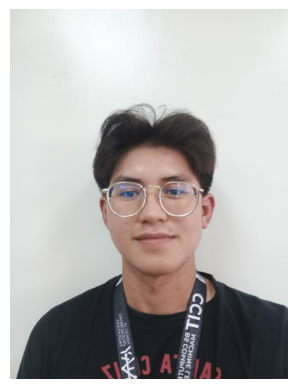

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    # Load the image from the path
    img = mpimg.imread(image_path)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage:
show_image('../data/Train/Rodney/IMG_20241011_150508_147.jpg')

In [7]:
# import os
# from PIL import Image

# # Path to your 'data/Train' folder
# data_path = '../data/Train/'  # Update if necessary

# # Folders to rotate
# folders_to_rotate = {
#     'Blix': 270,        # Rotate by 270 degrees
#     'Danyssa': 90,      # Rotate by 90 degrees
#     'Mark': 270         # Rotate by 270 degrees
# }

# # Loop through each folder
# for folder, rotation_angle in folders_to_rotate.items():
#     folder_path = os.path.join(data_path, folder)
    
#     # Check if folder exists
#     if not os.path.exists(folder_path):
#         print(f"Folder '{folder}' not found in '{data_path}'. Skipping...")
#         continue
    
#     # Get all image files in the folder
#     image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
#     # Rotate each image
#     for image_file in image_files:
#         image_path = os.path.join(folder_path, image_file)
        
#         # Open the image
#         with Image.open(image_path) as img:
#             # Rotate the image
#             rotated_img = img.rotate(-rotation_angle, expand=True)  # -angle rotates clockwise
            
#             # Save the rotated image (overwrite original)
#             rotated_img.save(image_path)
#             print(f"Rotated {image_file} in '{folder}' by {rotation_angle} degrees")

# print("Rotation complete.")


Rotated 20241011_150343.jpg in 'Blix' by 270 degrees
Rotated 20241011_150358.jpg in 'Blix' by 270 degrees
Rotated 20241011_150402.jpg in 'Blix' by 270 degrees
Rotated 20241011_150457.jpg in 'Blix' by 270 degrees
Rotated 20241011_150519.jpg in 'Blix' by 270 degrees
Rotated 20241011_150521.jpg in 'Blix' by 270 degrees
Rotated 20241011_150525.jpg in 'Blix' by 270 degrees
Rotated 20241011_150551.jpg in 'Blix' by 270 degrees
Rotated 20241011_150554.jpg in 'Blix' by 270 degrees
Rotated 20241011_150600.jpg in 'Blix' by 270 degrees
Rotated 20241011_150621.jpg in 'Blix' by 270 degrees
Rotated 20241011_150622.jpg in 'Blix' by 270 degrees
Rotated 20241011_150625.jpg in 'Blix' by 270 degrees
Rotated 20241011_150630.jpg in 'Blix' by 270 degrees
Rotated 20241011_150631.jpg in 'Blix' by 270 degrees
Rotated 20241011_150654.jpg in 'Blix' by 270 degrees
Rotated 20241011_150657.jpg in 'Blix' by 270 degrees
Rotated 20241011_150718.jpg in 'Blix' by 270 degrees
Rotated 20241011_150722.jpg in 'Blix' by 270 d

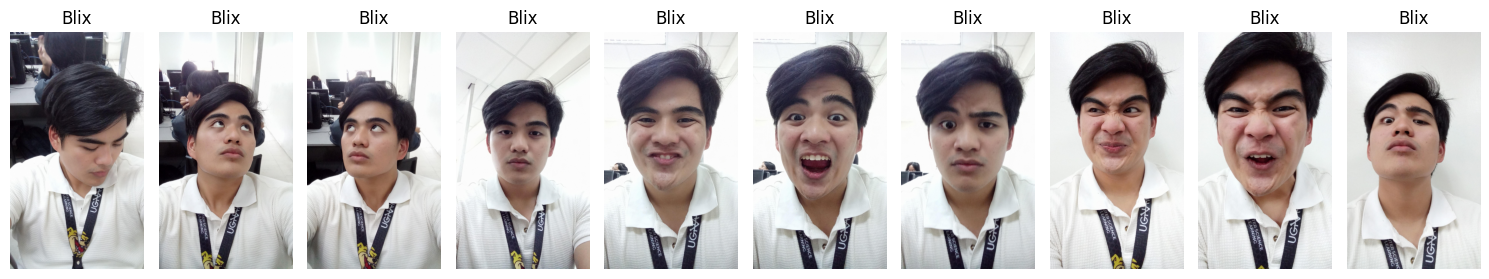

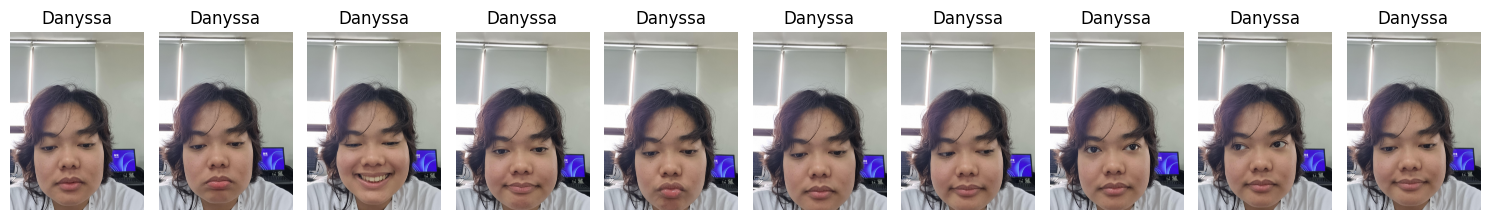

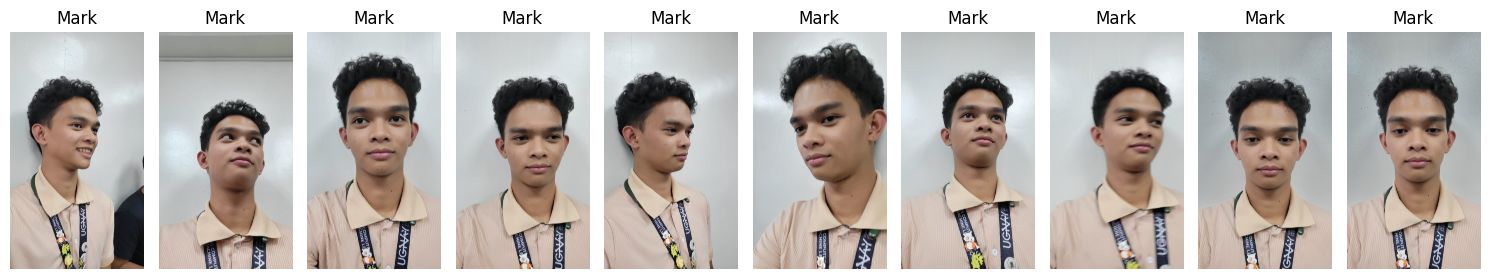

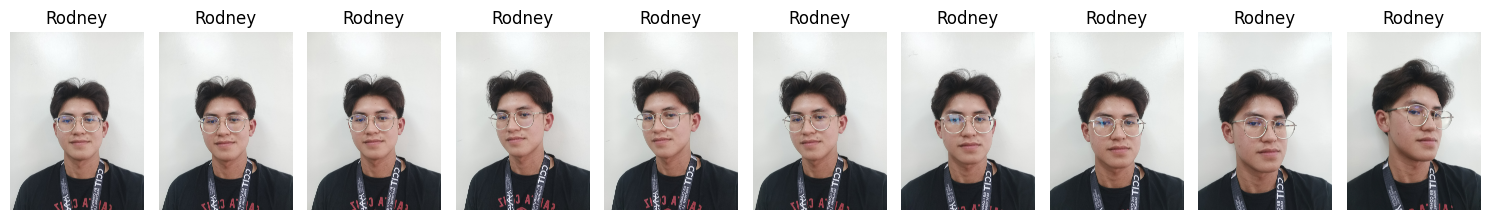

In [8]:
# Path to your 'data/Train' folder
data_path = '../data/Train/'  # Update this if needed

# Number of images to display per category (subfolder)
num_faces_per_category = 10

# Get a list of subfolders (categories) in 'data/Train'
categories = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

# Loop through each category (subfolder)
for category in categories:
    category_path = os.path.join(data_path, category)
    
    # Get all image files from the subfolder
    image_files = [os.path.join(category_path, f) for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # If fewer images are available than the requested number, adjust accordingly
    num_images = min(num_faces_per_category, len(image_files))

    # Set up the figure for displaying images from this category
    fig, axes = plt.subplots(1, num_images, figsize=(15, 6))  # 1 row, num_images columns
    if num_images == 1:  # Handle case with only 1 image
        axes = [axes]

    # Loop to display the images
    for i in range(num_images):
        image_path = image_files[i]  # Get the image path
        image = mpimg.imread(image_path)  # Load the image
        
        axes[i].imshow(image)  # Show the image
        axes[i].set_title(category)  # Set the title to the folder name (category)
        axes[i].axis('off')  # Hide axes

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## Load the images from your drive and apply preprocessing to your raw images

In [12]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, output_folder):
    images = []
    labels = []
    
    # Create output directory if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        
        # Create a corresponding folder in the output directory
        person_output_folder = os.path.join(output_folder, person_name)
        os.makedirs(person_output_folder, exist_ok=True)
        
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)

            if img is not None:  # Check if the image was loaded properly
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
                images.append(img.flatten())  # Flatten the image
                labels.append(person_name)

                # Save the processed image in the corresponding folder
                processed_image_path = os.path.join(person_output_folder, filename)
                cv2.imwrite(processed_image_path, img)
            else:
                print(f"Warning: {img_path} could not be loaded.")

    return np.array(images), np.array(labels)

# Path to your 'data/Train' folder
data_path = '../data/Train/'  # Update this if necessary
processed_data_path = '../data/processed_train_data/'  # Path for saving processed data

# Load and process images
images, labels = load_images_from_folder(data_path, processed_data_path)

print("Processing complete.")


Processing complete.


## Display one pre-processed image from the training set

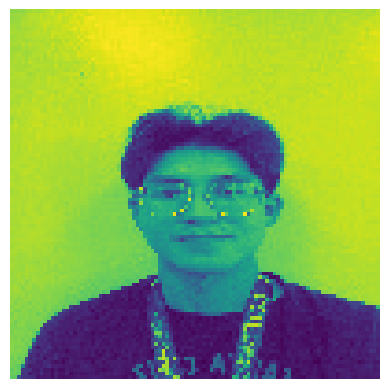

In [16]:
show_image('../data/processed_train_data/Rodney/IMG_20241011_150508_147.jpg')

## Display ten pre-processed images from the training set

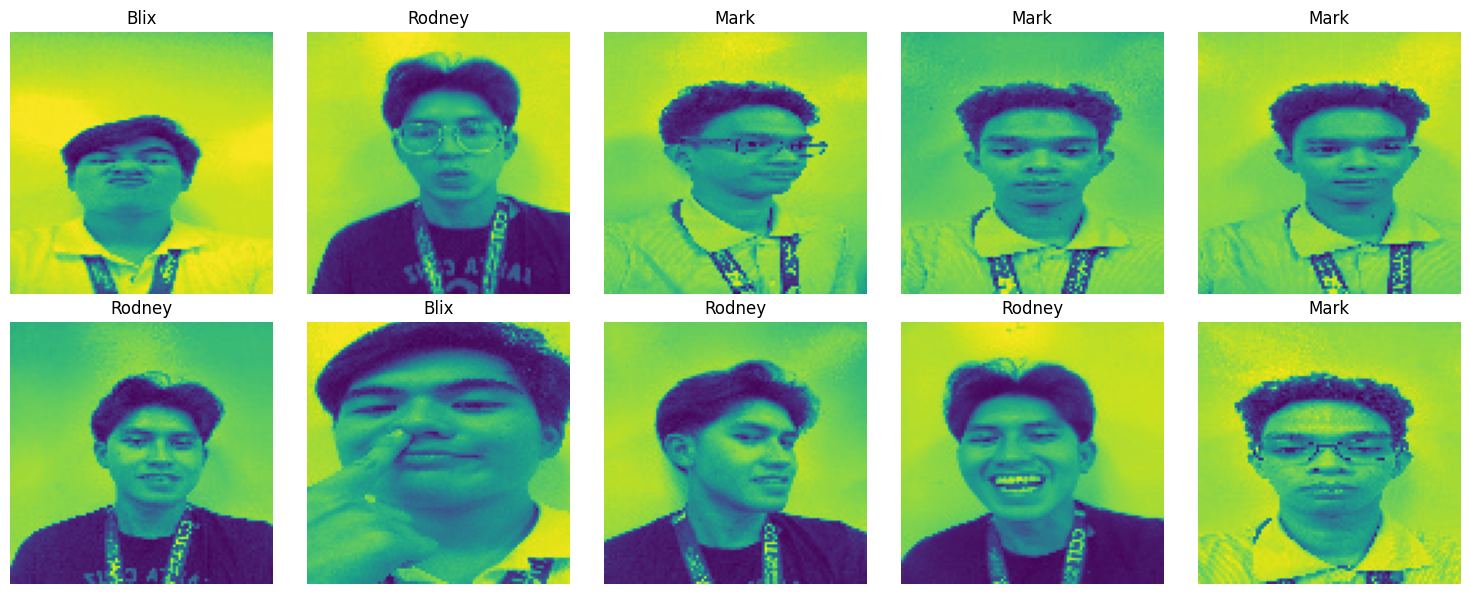

In [29]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(ax, image_path, label):
    # Load the image from the path
    img = mpimg.imread(image_path)
    
    # Display the image on the given axes
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(label)  # Set the title to the folder name (category)

def display_random_images(folder, num_images=10):
    # Get all subfolders (categories) in the folder
    categories = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
    
    # List to hold image paths and their corresponding labels
    image_paths = []

    # Collect image paths from all categories
    for category in categories:
        category_path = os.path.join(folder, category)
        image_files = [os.path.join(category_path, f) for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        for img_path in image_files:
            image_paths.append((img_path, category))  # Store (image_path, category)

    # Select random images
    random_images = random.sample(image_paths, min(num_images, len(image_paths)))

    # Set up the figure and axes for a grid layout
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
    axes = axes.flatten()  # Flatten the array of axes for easy indexing

    # Display each random image in the grid
    for i, (img_path, label) in enumerate(random_images):
        show_image(axes[i], img_path, label)  # Show image on corresponding axes with label

    # Hide any remaining axes if less than 10 images
    for j in range(len(random_images), len(axes)):
        axes[j].axis('off')  # Hide unused axes

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Path to the processed train data
processed_data_path = '../data/processed_train_data/'  # Update this if necessary

# Display ten random pre-processed images with folder names
display_random_images(processed_data_path, num_images=10)


## Split your data

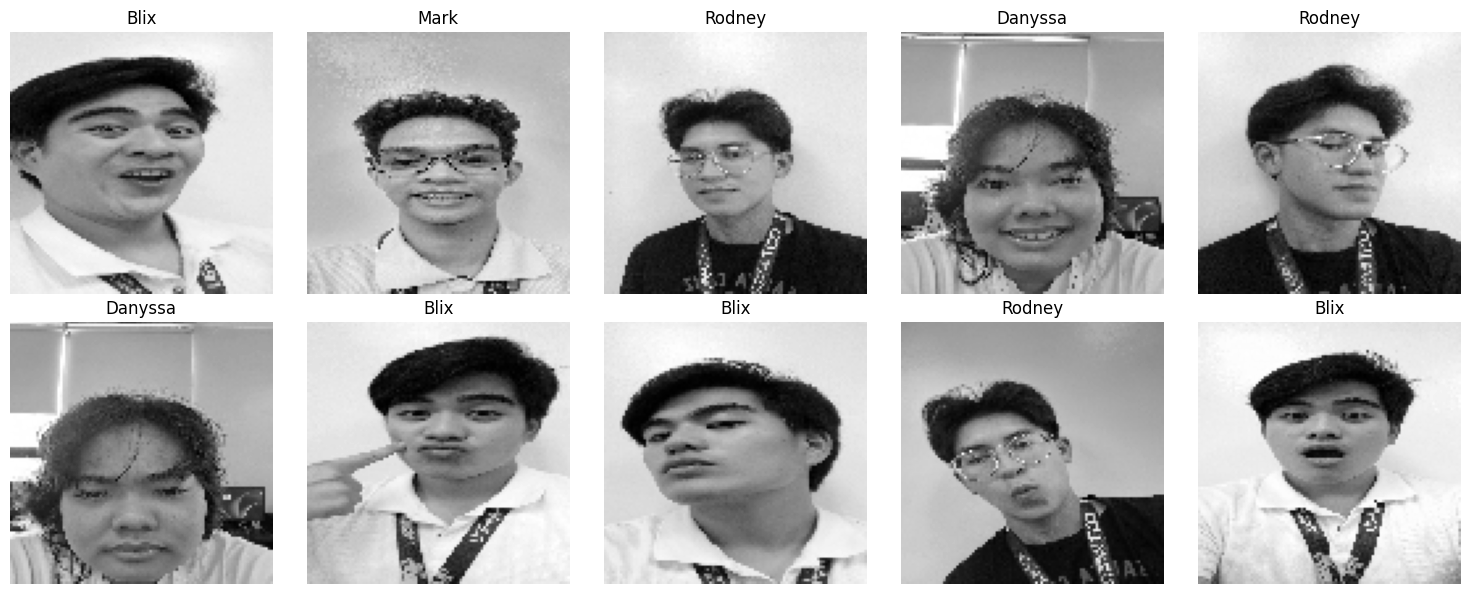

In [30]:
import os
import random
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to load and preprocess images from the specified folder
def load_images_from_folder(folder): 
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale (optional)
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

# Load images from the training data folder
data_folder = '../data/Train/'  # Path to your training data
images, labels = load_images_from_folder(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Function to show images in a grid layout
def show_image(ax, image_path, label):
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

def display_random_images(images, labels, num_images=10):
    # Combine images and labels for easy sampling
    image_data = list(zip(images, labels))

    # Select random images
    random_images = random.sample(image_data, min(num_images, len(image_data)))

    # Set up the figure and axes for a grid layout
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
    axes = axes.flatten()

    # Display each random image in the grid
    for i, (img, label) in enumerate(random_images):
        ax = axes[i]
        ax.imshow(img.reshape(100, 100), cmap='gray')  # Reshape to original dimensions
        ax.axis('off')
        ax.set_title(label)

    # Hide any remaining axes if less than 10 images
    for j in range(len(random_images), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Display ten random images from the training set
display_random_images(X_train, y_train, num_images=10)


## Train your SVM model

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can choose a different kernel if needed
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluate your model

Classification Report:
              precision    recall  f1-score   support

        Blix       0.75      1.00      0.86         6
     Danyssa       1.00      0.93      0.97        15
        Mark       1.00      0.89      0.94         9
      Rodney       1.00      1.00      1.00        10

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.94        40
weighted avg       0.96      0.95      0.95        40



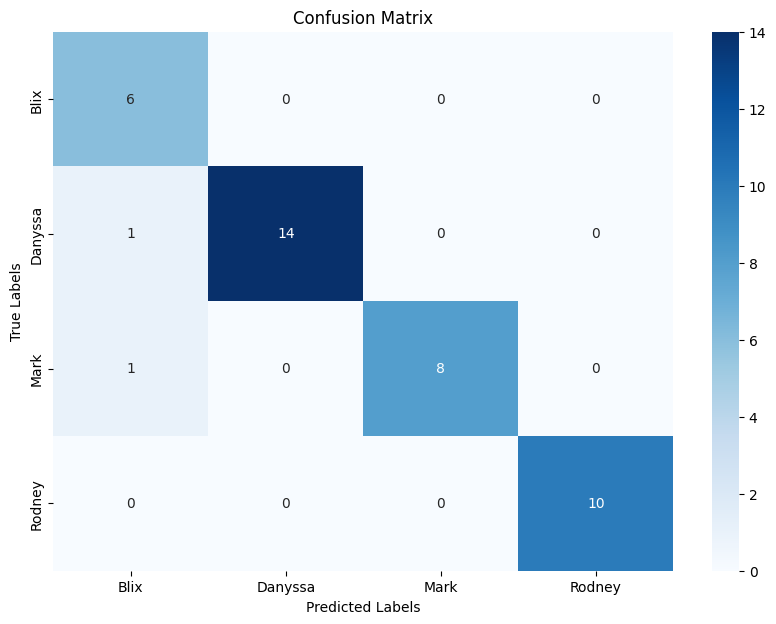

In [34]:
import seaborn as sns

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Set up the figure for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Test your model using images not in your training set

Test one image of yourself

In [39]:
import cv2
import matplotlib.pyplot as plt
import os

def predict_image_and_show(svm_model, image_path):
    """
    Predict the label of an image using the trained SVM model and display the image with its predicted label.
    
    Parameters:
        svm_model: The trained SVM model.
        image_path (str): The path to the image to be predicted.
    
    Returns:
        str: The predicted label for the image.
    """
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was loaded
    if img is None:
        return "Error: Image not found or unable to load."
    
    # Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize the image to match the training size
    img_resized = cv2.resize(img_gray, (100, 100))
    
    # Flatten the image
    img_flattened = img_resized.flatten().reshape(1, -1)  # Reshape for the model input

    # Make prediction
    prediction = svm_model.predict(img_flattened)

    # Get the filename from the image path
    image_name = os.path.basename(image_path)
    
    # Display the image with the predicted label and image name
    plt.imshow(img_gray, cmap='gray')
    plt.title(f'Image: {image_name}\nPredicted Label: {prediction[0]}')
    plt.axis('off')  # Hide axes
    plt.show()
    
    return prediction[0]  # Return the predicted label


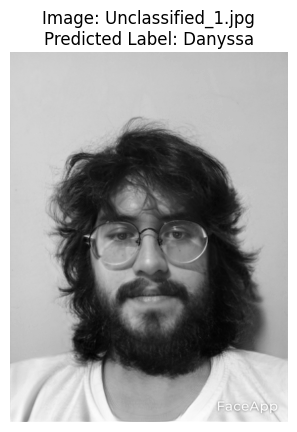

np.str_('Danyssa')

In [43]:
predict_image_and_show(svm_model, '../data/Test/Unclassified_1.jpg')

Test one image of your partner

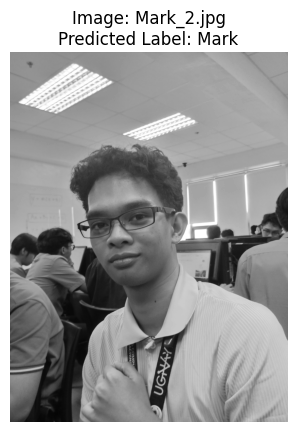

np.str_('Mark')

In [50]:
predict_image_and_show(svm_model, '../data/Test/Mark_2.jpg')

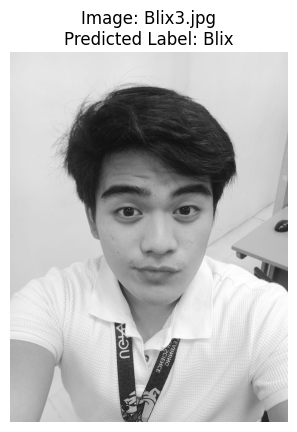

np.str_('Blix')

In [49]:
predict_image_and_show(svm_model, '../data/Test/Blix3.jpg')

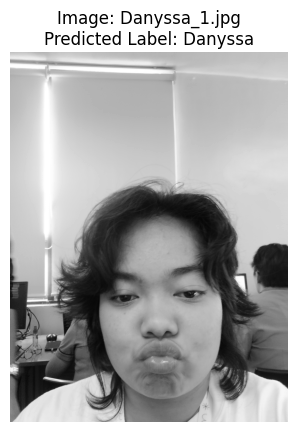

np.str_('Danyssa')

In [44]:
predict_image_and_show(svm_model, '../data/Test/Danyssa_1.jpg')

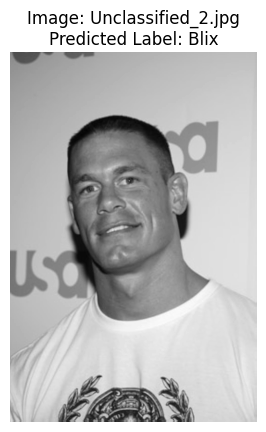

np.str_('Blix')

In [45]:
predict_image_and_show(svm_model, '../data/Test/Unclassified_2.jpg')

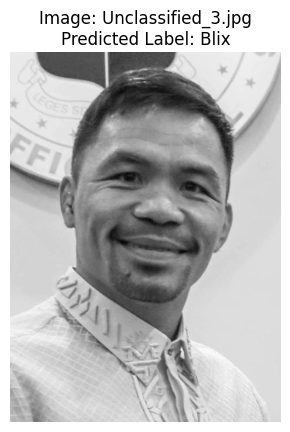

np.str_('Blix')

In [46]:
predict_image_and_show(svm_model, '../data/Test/Unclassified_3.jpg')

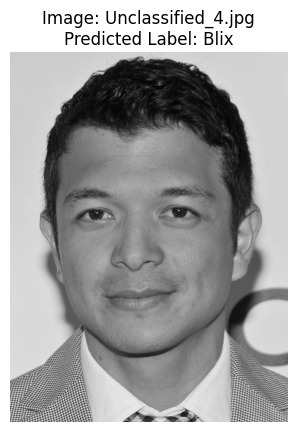

np.str_('Blix')

In [47]:
predict_image_and_show(svm_model, '../data/Test/Unclassified_4.jpg')

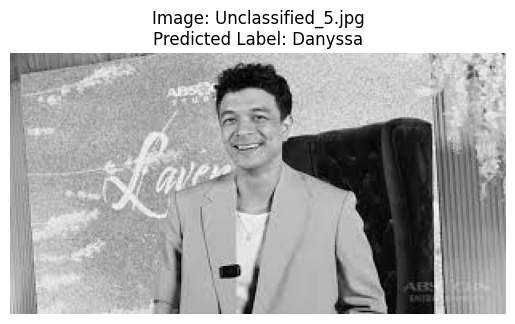

np.str_('Danyssa')

In [48]:
predict_image_and_show(svm_model, '../data/Test/Unclassified_5.jpg')

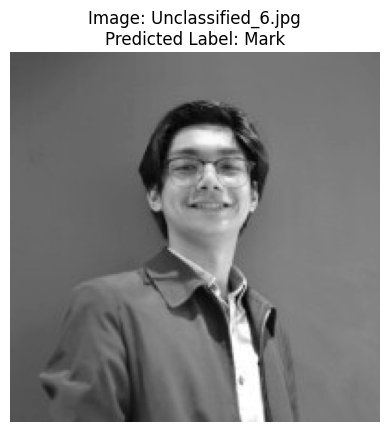

np.str_('Mark')

In [51]:
predict_image_and_show(svm_model, '../data/Test/Unclassified_6.jpg')